#  Pruebas con IBM Quantum Platform Classic.

![Imagen introduccion](assets/ibm_logo.png
)

---

#### Criptografía y comunicaciones seguras. Ciberseguridad. Programación cuántica.

---

#### **Autor:** *Héctor Ayuso Martín*

# Codificación superdensa. Transmisión segura de información.

![Imagen introduccion](assets/superdense.webp
)

## Set-up del experimento:


### Escenario.

*Laura* tiene dos bits clásicos Z = { 00 , 01 , 10 , 11 }, que desea trasmitir a *Sandro*.

> *Laura* solo puede enviar un **único qubit** a *Sandro*.

> *Laura* y *Sandro* comparten un par EPR (un e-bit).

### Observaciones.

> Sin el e-bit compartido, la tarea de *Laura* sería imposible.

> El Teorema de Holevo dice, que dos bits clásicos no pueden ser trasmitidos de manera fiable, sin errores, usando un solo qubit. Es necesario el entrelazamiento cuántico.

---

# Creación del circuito cuántico para aplicar el experimento.

![Imagen introduccion](assets/circuito_superdenso.png
)

*La imagen de arriba es una representación visual del estado transmisor de información, subdivido con los dos actores del experimento.*

### Importamos librerias necesarias.

In [ ]:
from qiskit import QuantumCircuit, transpile, ClassicalRegister
from qiskit_aer import AerSimulator
import numpy as np  

Esta celda importa Qiskit y Numpy.
> QuantumCircuit --> Para crear el circuito cuántico.

> AerSimulator --> Para simular la ejecución del circuito en un backend cuántico virtual.

> Transpile --> Para optimizar el circuito antes de la simulación.

### Función para crear el circuito

In [ ]:
def crear_circuito_superdenso(bits_a_enviar):
 
    # Crear un circuito nuevo.
    
    circuito = QuantumCircuit(2)
    creg = ClassicalRegister(2, 'c')  # Registro clásico para almacenar mediciones
    circuito.add_register(creg)

    # Creación del par EPR de Laura y Sandro.
    
    circuito.h(0)  # Hadamard en el primer qubit
    circuito.cx(0, 1)  # CNOT para generar el estado de Bell

    # Laura codifica los bits clásicos en su qubit.
    
    if bits_a_enviar == "01":
        circuito.x(0)  # Aplica X si el primer bit es 1
        
    elif bits_a_enviar == "10":
        circuito.z(0)  # Aplica Z si el segundo bit es 1
        
    elif bits_a_enviar == "11":
        circuito.x(0)
        circuito.z(0)  # Aplica X y Z si ambos bits son 1

    # Sandro decodifica el mensaje
    
    circuito.cx(0, 1)  # Deshace el entrelazamiento
    circuito.h(0)  # Hadamard en el primer qubit

    # Hacemos la medición
    
    circuito.measure([0, 1], [1, 0])  # Invertimos el orden de los bits clásicos, Qiskit invierte por defecto este orden..


    # Retornamos el circuito
    
    return circuito

> Cuando llamamos a esta función, nos devuelve un circuito peparado para el envio de información.

> Se reciben 2 bits en formato String, y Laura aplica las puertas cuánticas correspondientes.

### Definimos los bits que Laura quiere enviar a Sandro.

In [3]:
bits_a_enviar = "11"  # Puedes cambiar este valor a Z = { 00 , 01 , 10 , 11}

> Aquí se define que mensaje de **2 bits clásicos** va a enviar Laura.

> Se invita al lector a cambiar el valor de los dos bits y ejecutar de nuevo el experimento.

### Creamos el circuito.

In [4]:
circuito = crear_circuito_superdenso(bits_a_enviar)

### Visualizamos el circuito.


Circuito cuántico:


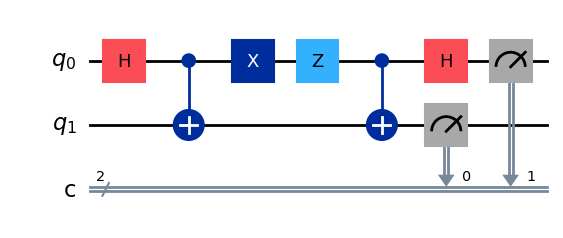

In [ ]:
print("\nCircuito cuántico:")

circuito.draw('mpl')

### Ejecutamos la simulación.

In [6]:
simulador = AerSimulator()

circuito_transpilado = transpile(circuito, simulador)

resultado = simulador.run(circuito_transpilado, shots=1024).result()

cuentas = resultado.get_counts()

> Primero "transpilamos" el circuito para que se adapte mejor al simulador.

> Ejecutamos la simulación 1024 veces y alamcenamos los resultados.

> cuentas contendrá el número de veces que apareció cada resultado posible, { 00 , 01 , 10 , 11}

### Ver los resultados de la medición

In [ ]:
print("\nResultados de la medición:")

for key, value in cuentas.items():
    print(f"  {key} → {value} veces")


Resultados de la medición:
  11 → 1024 veces


> Mostramos cuántas veces aparecdio para par de bits

> Si el experimento esta yendo bién, el valor mas frecuente debería ser el valor de los bits enviados por Laura.

### Comparamos los bits enviados por Laura en origen, y los bits recibidos por Sandro en destino.

In [ ]:
bits_recibidos = max(cuentas, key=cuentas.get)

print(f"\nSandro ha recibido los bits: {bits_recibidos}")
print('')
print(f"Coinciden con los bits originales de Laura: {'Sí' if bits_recibidos == bits_a_enviar else 'No'}")
print('')

if bits_recibidos == bits_a_enviar:
    print('ÉXITO EN LA COMUNICACIÓN')
    


Sandro ha recibido los bits: 11

Coinciden con los bits originales de Laura: Sí

ÉXITO EN LA COMUNICACIÓN


> Esto toma el resultado **más frecuente** de la medición.

> Se compara con los bits originales para verificar la transmisión.

La codificación superdensa no solo demuestra la superioridad de la computación cuántica en la transmisión de información , sino que también plantea un nuevo paradigma en la ciberseguridad y la criptografía. A través del entrelazamiento cuántico, se logra enviar dos bits de información utilizando un solo qubit, reduciendo la necesidad de canales clásicos y abriendo la puerta a comunicaciones más eficientes y, sobre todo, más seguras. En un mundo donde el espionaje digital y la interceptación de datos son amenazas constantes, la codificación superdensa ofrece un método donde la nformación no puede ser leída sin alterar su estado, proporcionando una detección inmediata de cualquier intento de intervención. Al ejecutar este experimento, comprobamos como Laura y Sandro pueden intercambiar datos con un nivel de confidencialidad que la criptografia clásica no puede igualar. En la actualidad, los sistemas de cifrado dependen de la dificultad matemática para resistir ataques, pero con la llegada de la computación cuántica, esos esquemas podrían volverse obsoletos. La codificación superdensa es un paso más hacia una infraestructura cuántica donde la transmisión de información no solo es más eficiente, sino también más resistente a la vigilancia y la manipulación. Con este experimento, exploramos un mecanismo que podría redefinir la seguridad de las redes, permitiendo conexiones inviolables que garanticen la integridad y privacidad de los datos en la era de la ciber guerra.

1 qubit de comunicación cuántica  
    ⟺     
    2 bits de comunicación clásica



![Imagen introduccion](assets/quantum_spy.webp
)

---

![Imagen introduccion](assets/flag.png
)

> Barcelona, 4 de Marzo de 2025